In [ ]:
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# modeling
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/IMDb Movies India.csv', encoding='latin1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
df.shape

(15509, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
df.describe(include='all')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7919.000000,7920,14984,13892,13125,12365
unique,13838,102,182,485,NaN,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,NaN,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,NaN,227,58,158,83,91
mean,NaN,NaN,NaN,NaN,5.841621,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.381777,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


Missing Data

In [ ]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

<Axes: >

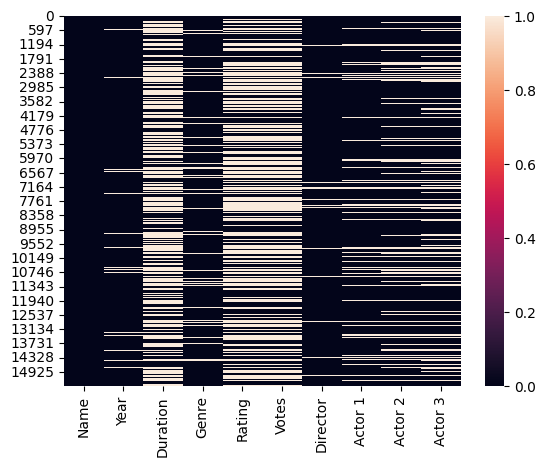

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
missing_count = df.isnull().sum().sort_values(ascending=False)
missing_percent = (round(df.isnull().sum()/df.isnull().count(), 4)*100).sort_values(ascending=False)
missing_data = pd.concat([missing_count, missing_percent],
                       axis=1,
                       keys=['missing_count', 'missing_percent'])
missing_data

,missing_count,missing_percent
Duration,8269,53.32
Rating,7590,48.94
Votes,7589,48.93
Actor 3,3144,20.27
Actor 2,2384,15.37
Genre,1877,12.10
Actor 1,1617,10.43
Year,528,3.40
Director,525,3.39
Name,0,0.00


In [ ]:
df.dropna(subset=['Rating'], inplace=True)

(round(df.isnull().sum()/df.isnull().count(), 4)*100).sort_values(ascending=False)

Duration    26.11
Actor 3      3.69
Actor 2      2.53
Actor 1      1.58
Genre        1.29
Director     0.06
Name         0.00
Year         0.00
Rating       0.00
Votes        0.00
dtype: float64

In [ ]:
df.dropna(subset=['Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Genre'], inplace=True)

(round(df.isnull().sum()/df.isnull().count(), 4)*100).sort_values(ascending=False)

Duration    25.13
Name         0.00
Year         0.00
Genre        0.00
Rating       0.00
Votes        0.00
Director     0.00
Actor 1      0.00
Actor 2      0.00
Actor 3      0.00
dtype: float64

In [ ]:
df['Duration'] = pd.to_numeric(df['Duration'].str.strip(' min'))
df['Duration'].fillna(df['Duration'].mean(), inplace=True)

df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(7558, 10)

In [ ]:
df['Year'] = df['Year'].apply(lambda x: x.split(')')[0])

year_lst = []
for val in df['Year']:
    if len(val.split('(')) == 1:
        year_lst.append(val.split('(')[0])
    elif len(val.split('(')) > 1:
        year_lst.append(val.split('(')[1])
df['Year'] = year_lst

In [ ]:
df['Votes'] = df['Votes'].str.replace(',', '').astype(int)
df['Year'] = df['Year'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7558 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7558 non-null   object 
 1   Year      7558 non-null   int64  
 2   Duration  7558 non-null   float64
 3   Genre     7558 non-null   object 
 4   Rating    7558 non-null   float64
 5   Votes     7558 non-null   int64  
 6   Director  7558 non-null   object 
 7   Actor 1   7558 non-null   object 
 8   Actor 2   7558 non-null   object 
 9   Actor 3   7558 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 649.5+ KB


In [ ]:
df['Year'].unique()

array([2019, 1997, 2005, 2012, 2014, 2004, 2016, 1991, 2018, 2010, 1958,
       2021, 2017, 2009, 1993, 2002, 1946, 2008, 1994, 2007, 2013, 2003,
       1998, 1979, 1974, 2015, 2006, 1981, 2020, 1985, 2011, 1988, 1995,
       1987, 1999, 1973, 1968, 1953, 1986, 1982, 1977, 1950, 1969, 1948,
       1967, 1970, 1990, 1989, 1947, 2001, 2000, 1971, 1978, 1944, 1963,
       1992, 1976, 1984, 1975, 1980, 1966, 1972, 1956, 1960, 1964, 1952,
       1959, 1951, 1954, 1962, 1961, 1957, 1965, 1996, 1933, 1955, 1983,
       1936, 1949, 1940, 1945, 1938, 1941, 1942, 1932, 1935, 1937, 1931,
       1943, 1917, 1939, 1934])

In [ ]:
(df['Duration']>180).sum()

113

In [ ]:
(df['Duration']>60).sum()

7528

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7558 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7558 non-null   object 
 1   Year      7558 non-null   int64  
 2   Duration  7558 non-null   float64
 3   Genre     7558 non-null   object 
 4   Rating    7558 non-null   float64
 5   Votes     7558 non-null   int64  
 6   Director  7558 non-null   object 
 7   Actor 1   7558 non-null   object 
 8   Actor 2   7558 non-null   object 
 9   Actor 3   7558 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 649.5+ KB


In [ ]:
df[['Rating', 'Duration', 'Votes']].describe(percentiles=[0.75,0.8, 0.9, 0.95, 0.98])

,Rating,Duration,Votes
count,7558.000000,7558.000000,7558.000000
mean,5.811127,133.439124,2029.123842
std,1.368255,21.908841,11868.695754
min,1.100000,21.000000,5.000000
50%,6.000000,133.439124,61.000000
75%,6.800000,144.000000,456.000000
80%,7.000000,149.000000,797.600000
90%,7.400000,160.000000,3182.900000
95%,7.800000,169.000000,8662.150000
98%,8.200000,180.000000,21935.900000


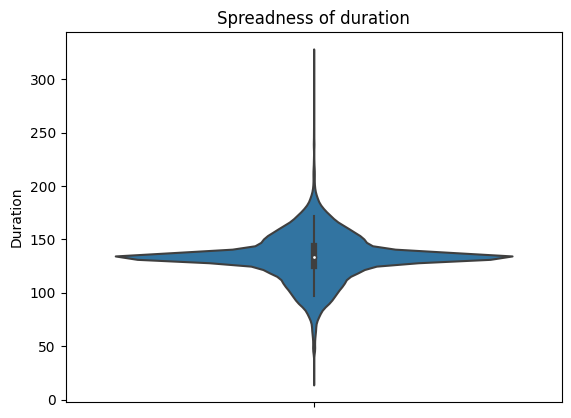

In [ ]:
sns.violinplot(y=df['Duration'])
plt.title('Spreadness of duration')
plt.show()

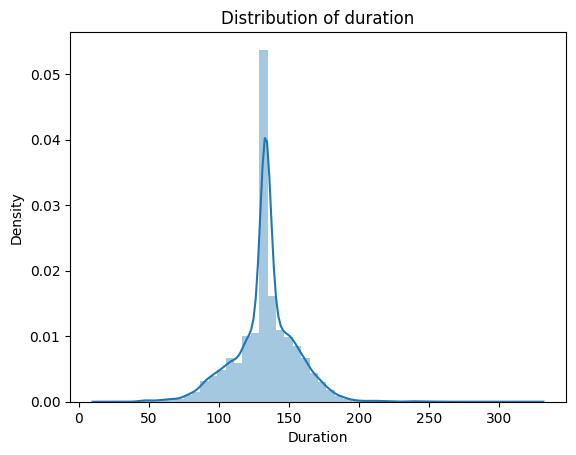

In [ ]:
sns.distplot(df['Duration'])
plt.title('Distribution of duration')
plt.show()

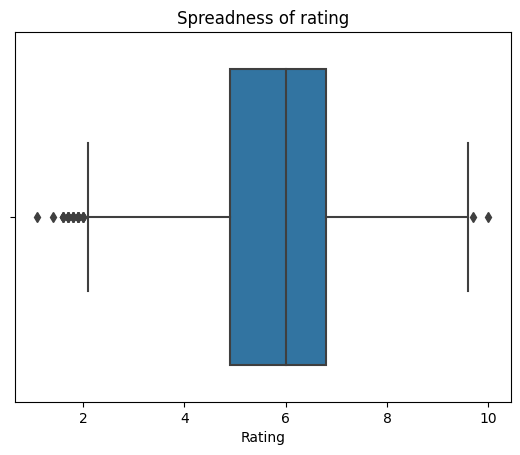

In [ ]:
sns.boxplot(x=df['Rating'])
plt.title('Spreadness of rating')
plt.show()

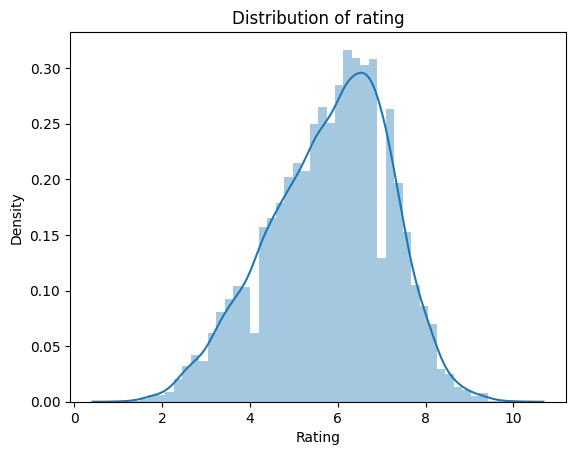

In [ ]:
sns.distplot(df['Rating'])
plt.title('Distribution of rating')
plt.show()

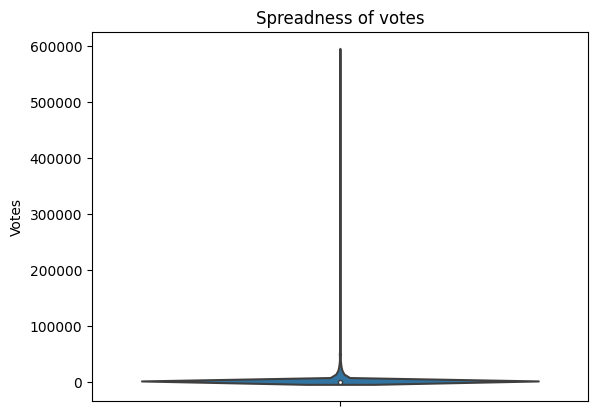

In [ ]:
sns.violinplot(y=df['Votes'])
plt.title('Spreadness of votes')
plt.show()